In [1]:
import sys
import regions
import numpy as np
import PIL

from regions import Regions

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization import simple_norm

import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u

from spectral_cube import SpectralCube

from astropy.visualization.wcsaxes import add_scalebar

from pvextractor import Path, extract_pv_slice

/blue/adamginsburg/adamginsburg/repos/pvextractor/pvextractor/pvregions.py:43: SyntaxWarning: invalid escape sequence '\('
  coordre = re.compile("^[a-z]*\((.*)\)")


In [2]:
%cd ..
from jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
import cutout_manager as cm
import jwst_plots
%cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament
/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [3]:
%cd /blue/adamginsburg/savannahgramze/cloudc/smart-plotters/smart-plotters
import outflow_plots as op
%cd /blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks

/blue/adamginsburg/savannahgramze/cloudc/smart-plotters/smart-plotters
/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [4]:
def get_levels(data, percents=[95, 98, 99]):
    levels = np.percentile(data, percents)
    return levels

# Cores

In [5]:
clump1 = SkyCoord('17:46:19.2287619119', '-28:38:29.2978617171', unit=(u.hourangle, u.deg))
cutout_clump1 = cm.Cutout(clump1, 5*u.arcsec, 5*u.arcsec)
clump2 = SkyCoord('17:46:19.5945777603', '-28:38:09.9402161687', unit=(u.hourangle, u.deg))
cutout_clump2 = cm.Cutout(clump2, 5*u.arcsec, 5*u.arcsec)

In [6]:
cutout_clump1_rgb3, clump_rgb1_ww = cutout_clump1.get_cutout_rgb3()
cutout_clump2_rgb3, clump_rgb2_ww = cutout_clump2.get_cutout_rgb3()

cutout_clump1_B3 = cutout_clump1.get_alma_B3()
cutout_clump2_B3 = cutout_clump2.get_alma_B3()

/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/orange/adamginsburg/miniconda3/envs/python312/lib/python3.12/site-packages/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


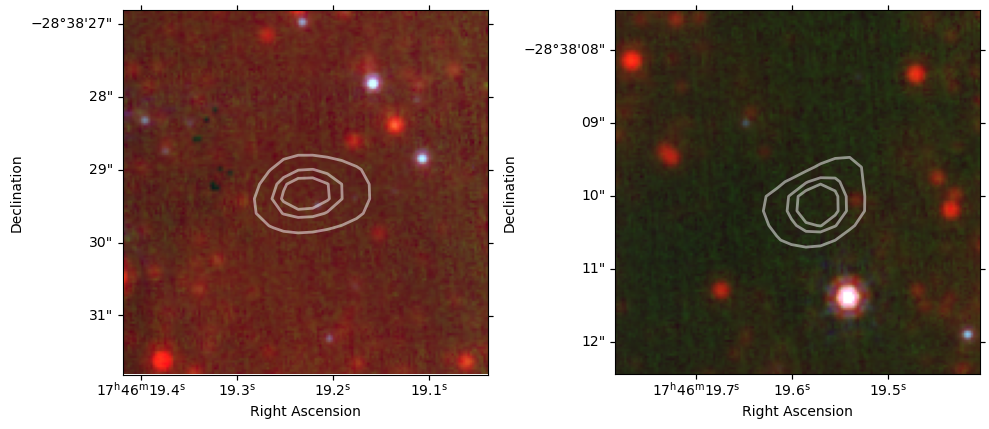

In [7]:
plt.figure(figsize=(10,5))
ax = plt.subplot(121, projection=clump_rgb1_ww)#, origin='lower')
ax.imshow(cutout_clump1_rgb3)
ax.contour(cutout_clump1_B3.data, levels=get_levels(cutout_clump1_B3.data), colors='white', alpha=0.5, linewidths=2, transform=ax.get_transform(cutout_clump1_B3.wcs))

ax.set_ylabel('Declination')
ax.set_xlabel('Right Ascension')

ax2 = plt.subplot(122, projection=clump_rgb2_ww)#, origin='lower')
ax2.imshow(cutout_clump2_rgb3)
ax2.contour(cutout_clump2_B3.data, levels=get_levels(cutout_clump2_B3.data), colors='white', alpha=0.5, linewidths=2, transform=ax2.get_transform(cutout_clump2_B3.wcs))
ax2.set_ylabel('Declination')
ax2.set_xlabel('Right Ascension')
plt.tight_layout()

# Filament

In [8]:
pos_ctr = SkyCoord('17:46:19.4437145447', '-28:38:18.4192304091', unit=(u.hourangle, u.deg))
l = 60*u.arcsec#3*u.arcmin#2.0*u.arcmin
w = 30*u.arcsec#1.3*u.arcmin#1.0*u.arcmin
reg_filabox_ = regions.RectangleSkyRegion(center=pos_ctr, width=w, height=l)

cutout_filament = cm.Cutout(pos_ctr, l, w)
cutout_filament_rgb, filament_rgb_ww = cutout_filament.get_cutout_rgb()

In [9]:
cutout_outflows = op.OutflowPlot(pos_ctr, l, w)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


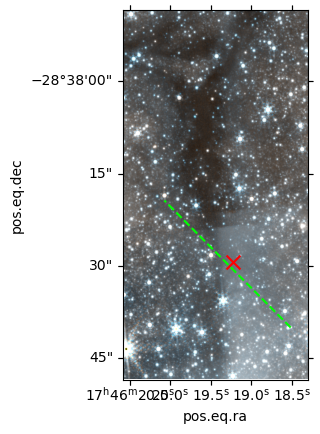

In [60]:
ax = plt.subplot(projection=filament_rgb_ww)
ax.imshow(cutout_filament_rgb)
path1.show_on_axis(ax, spacing=1, color='lime', linestyle='--')
ax.scatter(clump1.ra, clump1.dec, color='red', s=100, marker='x', transform=ax.get_transform('world'))

# Outflows

In [54]:
path1 = Path(SkyCoord(['17:46:18.5127712028', '17:46:20.0740692721'], ['-28:38:39.9953073102', '-28:38:19.3409070189'], unit=(u.hourangle, u.deg)))
path3 = Path(SkyCoord(['17:46:19.1810032784','17:46:19.9997717313'],['-28:38:08.4187172916','-28:38:12.2642134752'], unit=(u.hourangle, u.deg)))


In [12]:
cube_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image.pbcor.fits'
restfreq = 86.84696*u.GHz # ACES SiO 2-1
outflow_c1 = op.OutflowPlot(clump1, l=25*u.arcsec, w=25*u.arcsec, cube_fn=cube_fn, restfreq=restfreq)
outflow_c2 = op.OutflowPlot(clump2, l=10*u.arcsec, w=10*u.arcsec, cube_fn=cube_fn, restfreq=restfreq)

In [13]:
reg_list = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/outflow_list.region')
outflow_list = op.OutflowPlot(cube_fn=cube_fn, restfreq=restfreq, reg=reg_list)


In [14]:
fn = f'/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s38_0.Sgr_A_star_sci.spw33.cube.I.iter1.image.pbcor.fits'
rest_CS = 97.98095*u.GHz # ACES CS 2-1
cube_CS = SpectralCube.read(fn, use_dask=True)
subcube_CS = cube_CS.subcube_from_regions([reg_filabox_])

In [15]:
fn = f'/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image.pbcor.fits'
cube_SiO = SpectralCube.read(fn, use_dask=True)
subcube = cube_SiO.subcube_from_regions([reg_filabox_])
#.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restfreq).spectral_slab(-100*u.km/u.s, 0*u.km/u.s)

In [16]:
subcube_SiO = subcube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=restfreq).spectral_slab(-70*u.km/u.s, -40*u.km/u.s)
subcube_CS = subcube_CS.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=rest_CS).spectral_slab(-70*u.km/u.s, -40*u.km/u.s)

In [55]:
pvdiagram1 = extract_pv_slice(cube=subcube_SiO, path=path1, spacing=1)
pvdiagram3 = extract_pv_slice(cube=subcube_SiO, path=path3, spacing=1)
pvdiagram1_CS = extract_pv_slice(cube=subcube_CS, path=path1, spacing=1)
pvdiagram3_CS = extract_pv_slice(cube=subcube_CS, path=path3, spacing=1)

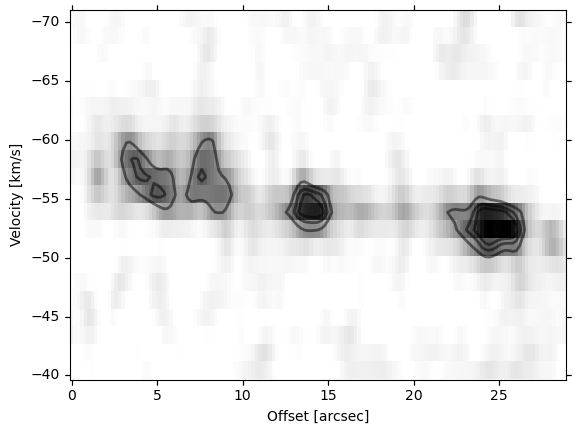

In [51]:
ax2 = plt.subplot(111, projection=WCS(pvdiagram1_CS.header))
ax2.imshow(pvdiagram1_CS.data, cmap='Greys', vmin=0)
ax2.contour(pvdiagram1_CS.data, levels=get_levels(pvdiagram1_CS.data), colors='k', alpha=0.5, linewidths=2, transform=ax2.get_transform(WCS(pvdiagram1_CS.header)))

#ax2.coords[0].set_ticks(spacing=1*u.arcsec)
ax2.coords[1].set_format_unit(u.km/u.s)
ax2.coords[0].set_format_unit(u.arcsec)
ax2.coords[0].set_major_formatter('x')

ax2.set_xlabel('Offset [arcsec]')
ax2.set_ylabel('Velocity [km/s]')
ax2.set_aspect('auto')

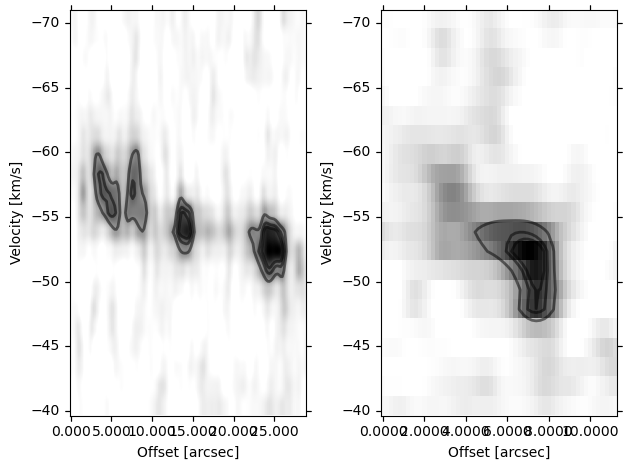

In [18]:
ax2 = plt.subplot(121, projection=WCS(pvdiagram1_CS.header))
ax2.imshow(pvdiagram1_CS.data, cmap='Greys', vmin=0)
ax2.contour(pvdiagram1_CS.data, levels=get_levels(pvdiagram1_CS.data), colors='k', alpha=0.5, linewidths=2, transform=ax2.get_transform(WCS(pvdiagram1_CS.header)))

ax2.coords[1].set_format_unit(u.km/u.s)
ax2.coords[0].set_format_unit(u.arcsec)
ax2.set_xlabel('Offset [arcsec]')
ax2.set_ylabel('Velocity [km/s]')
ax2.set_aspect('auto')

ax3 = plt.subplot(122, projection=WCS(pvdiagram3_CS.header))
ax3.imshow(pvdiagram3_CS.data, cmap='Greys', vmin=0)
ax3.contour(pvdiagram3_CS.data, levels=get_levels(pvdiagram3_CS.data), colors='k', alpha=0.5, linewidths=2, transform=ax3.get_transform(WCS(pvdiagram3_CS.header)))

ax3.coords[1].set_format_unit(u.km/u.s)
ax3.coords[0].set_format_unit(u.arcsec)
ax3.set_xlabel('Offset [arcsec]')
ax3.set_ylabel('Velocity [km/s]')
ax3.set_aspect('auto')

plt.tight_layout()

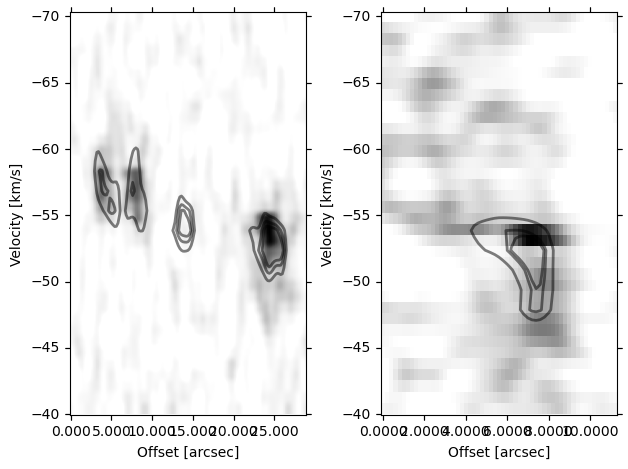

In [52]:
ax2 = plt.subplot(121, projection=WCS(pvdiagram1.header))
ax2.imshow(pvdiagram1.data, cmap='Greys', vmin=0)
ax2.contour(pvdiagram1_CS.data, levels=get_levels(pvdiagram1_CS.data), colors='k', alpha=0.5, linewidths=2, transform=ax2.get_transform(WCS(pvdiagram1_CS.header)))

ax2.coords[1].set_format_unit(u.km/u.s)
ax2.coords[0].set_format_unit(u.arcsec)
ax2.set_xlabel('Offset [arcsec]')
ax2.set_ylabel('Velocity [km/s]')
ax2.set_aspect('auto')

ax3 = plt.subplot(122, projection=WCS(pvdiagram3.header))
ax3.imshow(pvdiagram3.data, cmap='Greys', vmin=0)
ax3.contour(pvdiagram3_CS.data, levels=get_levels(pvdiagram3_CS.data), colors='k', alpha=0.5, linewidths=2, transform=ax3.get_transform(WCS(pvdiagram3_CS.header)))

ax3.coords[1].set_format_unit(u.km/u.s)
ax3.coords[0].set_format_unit(u.arcsec)
ax3.set_xlabel('Offset [arcsec]')
ax3.set_ylabel('Velocity [km/s]')
ax3.set_aspect('auto')

plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


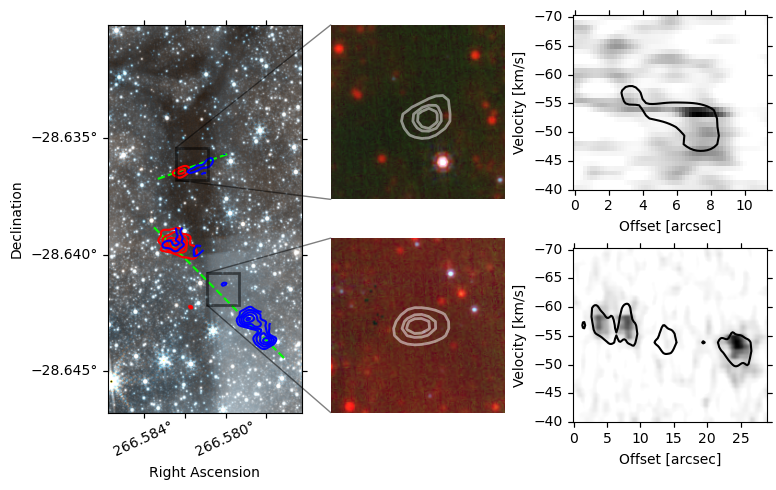

In [83]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(111, projection=filament_rgb_ww)
ax.imshow(cutout_filament_rgb)
path1.show_on_axis(ax, spacing=1, color='lime', linestyle='--')
path3.show_on_axis(ax, spacing=1, color='lime', linestyle='--')
#outflow_c1.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
outflow_list.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.coords[0].set_major_formatter('d.ddd')
ax.coords[0].set_ticklabel(exclude_overlapping=True, rotation=25, pad=20)
ax.coords[1].set_major_formatter('d.ddd')

#ax1 = plt.subplot(232, projection=clump_rgb2_ww)
ax1 = ax.inset_axes([1.1, 0.55, 1, 0.45], projection=clump_rgb2_ww)
ax1.imshow(cutout_clump2_rgb3)
ax1.contour(cutout_clump2_B3.data, levels=get_levels(cutout_clump2_B3.data), colors='white', alpha=0.5, linewidths=2, transform=ax1.get_transform(cutout_clump2_B3.wcs))
pos2 = SkyCoord.to_pixel(clump2, filament_rgb_ww)
pixelscale = u.pixel_scale(proj_plane_pixel_scales(clump_rgb2_ww)[0]*u.deg/u.pix)
dx = (5*u.arcsec).to(u.pix, pixelscale).value
ax.indicate_inset(bounds=[pos2[0]-dx/2, pos2[1]-dx/2, dx, dx], inset_ax=ax1, edgecolor='k', linewidth=2)
ax1.set_axis_off()

#ax2 = plt.subplot(235, projection=clump_rgb1_ww)
ax2 = ax.inset_axes([1.1, 0.0, 1, 0.45], projection=clump_rgb1_ww)
ax2.imshow(cutout_clump1_rgb3)
ax2.contour(cutout_clump1_B3.data, levels=get_levels(cutout_clump1_B3.data), colors='white', alpha=0.5, linewidths=2, transform=ax2.get_transform(cutout_clump1_B3.wcs))
pos1 = SkyCoord.to_pixel(clump1, filament_rgb_ww)
pixelscale = u.pixel_scale(proj_plane_pixel_scales(clump_rgb1_ww)[0]*u.deg/u.pix)
dx = (5*u.arcsec).to(u.pix, pixelscale).value
ax.indicate_inset(bounds=[pos1[0]-dx/2, pos1[1]-dx/2, dx, dx], inset_ax=ax2, edgecolor='k', linewidth=2)
ax2.set_axis_off()

#ax4 = plt.subplot(233, projection=WCS(pvdiagram3.header))
ax4 = ax.inset_axes([2.4, 0.575, 1., 0.45], projection=WCS(pvdiagram3.header))
ax4.imshow(pvdiagram3.data, cmap='Greys', vmin=0, aspect='auto')
ax4.contour(pvdiagram3_CS.data, levels=get_levels(pvdiagram3_CS.data, percents=[93]), colors='k', transform=ax4.get_transform(WCS(pvdiagram3_CS.header)))
ax4.coords[1].set_format_unit(u.km/u.s)
ax4.coords[0].set_format_unit(u.arcsec)
ax4.coords[0].set_major_formatter('x')
ax4.set_xlabel('Offset [arcsec]')
ax4.set_ylabel('Velocity [km/s]')
ax4.set_aspect('auto')
#ax4.coords[0].set_major_formatter('d.d')

#ax3 = plt.subplot(236, projection=WCS(pvdiagram1.header))
ax3 = ax.inset_axes([2.4, -0.025, 1., 0.45], projection=WCS(pvdiagram1.header))
ax3.imshow(pvdiagram1.data, cmap='Greys', vmin=0)
ax3.contour(pvdiagram1_CS.data, levels=get_levels(pvdiagram1_CS.data, percents=[93]), colors='k', transform=ax3.get_transform(WCS(pvdiagram1_CS.header)))
ax3.coords[1].set_format_unit(u.km/u.s)
ax3.coords[0].set_format_unit(u.arcsec)
ax3.coords[0].set_major_formatter('x')
ax3.set_xlabel('Offset [arcsec]')
ax3.set_ylabel('Velocity [km/s]')
ax3.set_aspect('auto')

#
plt.tight_layout()
plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/poster_starformation.svg', dpi=300, bbox_inches='tight')

In [84]:
ax4.coords[0]